In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
df = pd.read_csv('TaxiData.csv')

# print(df['pickup_longitude'].isna().sum())
df['trip_seconds'] = df['trip_seconds'].fillna(0)

# df.sort_values(by='trip_miles')

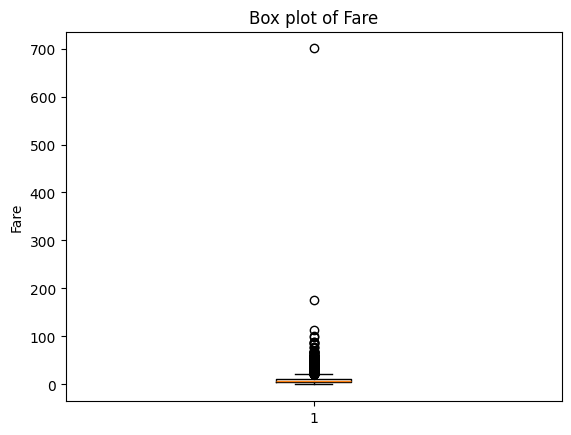

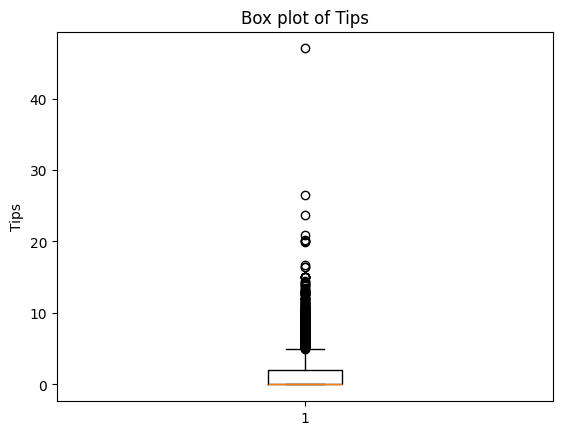

In [46]:
# 4.a

# Box plot for fare
plt.boxplot(df['fare'])
plt.title('Box plot of Fare')
plt.ylabel('Fare')
plt.savefig('4a_1.png')
plt.show()
plt.close()

# Box plot for tips
plt.boxplot(df['tips'])
plt.title('Box plot of Tips')
plt.ylabel('Tips')
plt.savefig('4a_2.png')
plt.show()
plt.close()


Here, outliers in both fare and tips greatly increase the average calculations due to their large magnitude.

In [47]:
# 4.b
# The first two rows of `df` have null entries of latitude and longitude
# For the regression, these two entries are removed
df1 = df[['trip_seconds', 'trip_miles', 'pickup_latitude', 'pickup_longitude', 'fare']].tail(-2)
df1.head()
df1.to_csv('data.csv', header=False, index=False)


In [48]:
from sklearn.decomposition import PCA

# Select the columns for PCA
coords = df1[['pickup_latitude', 'pickup_longitude']]

# Apply PCA
pca = PCA(n_components=1)
coords_pca = pca.fit_transform(coords)

# Add the PCA result back to the dataframe
df1['coords_pca'] = coords_pca

df1.head()

,trip_seconds,trip_miles,pickup_latitude,pickup_longitude,fare,coords_pca
2,1380.0,12.6,41.836150,-87.648788,27.05,0.031304
3,180.0,0.0,41.985015,-87.804532,5.85,-0.166235
4,1080.0,0.0,41.968069,-87.721559,16.65,-0.082510
5,780.0,6.9,41.983636,-87.723583,16.45,-0.089781
6,1200.0,15.4,41.953582,-87.723452,32.05,-0.079290


In [49]:
from sklearn.manifold import TSNE

# Apply T-SNE
tsne = TSNE(n_components=1, random_state=42)
coords_tsne = tsne.fit_transform(coords)

# Add the T-SNE result back to the dataframe
df1['coords_tsne'] = coords_tsne

df1.head()

,trip_seconds,trip_miles,pickup_latitude,pickup_longitude,fare,coords_pca,coords_tsne
2,1380.0,12.6,41.836150,-87.648788,27.05,0.031304,54.989620
3,180.0,0.0,41.985015,-87.804532,5.85,-0.166235,-90.612930
4,1080.0,0.0,41.968069,-87.721559,16.65,-0.082510,-93.332870
5,780.0,6.9,41.983636,-87.723583,16.45,-0.089781,-92.000923
6,1200.0,15.4,41.953582,-87.723452,32.05,-0.079290,-88.280853


In [68]:
from sklearn import linear_model

features = ['trip_seconds', 'trip_miles', 'pickup_latitude', 'pickup_longitude']
target = 'fare'

X = df1[features].values.reshape(-1, len(features))
y = df1[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [69]:
model.coef_

array([ 5.17994671e-03,  7.73429524e-02, -2.32882093e+01, -6.04967157e+01])

In [70]:
model.intercept_

np.float64(-4319.627229003837)

In [71]:
model.score(X, y)

0.4190648660096027

<Axes: >

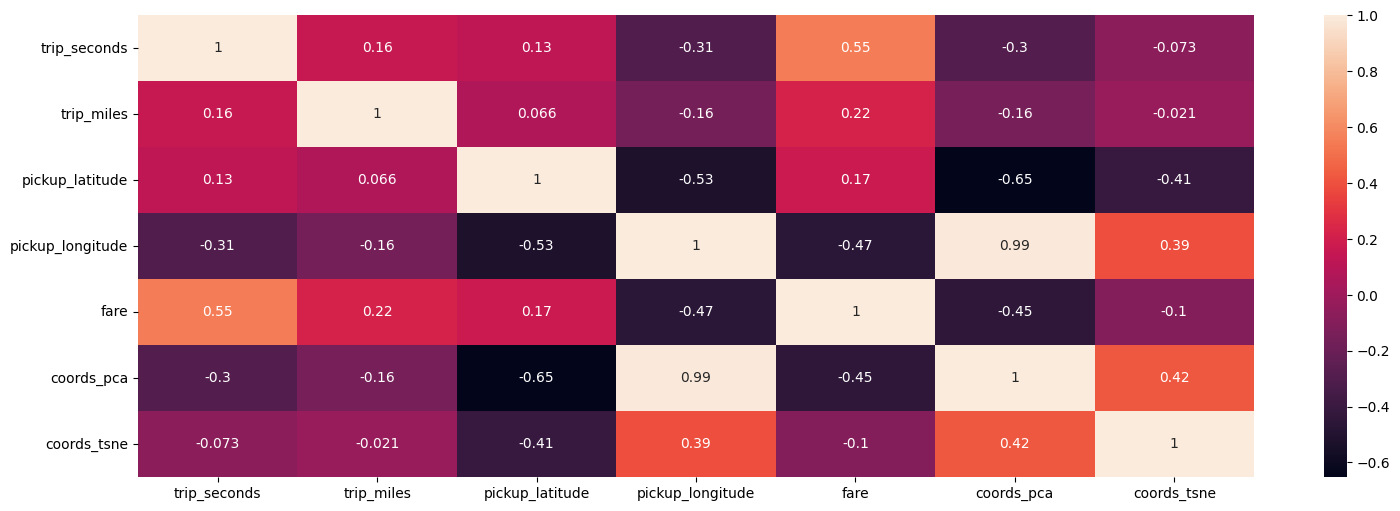

In [72]:
# Correlation Matrix for Testing Data
import seaborn as sns

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(df1.corr(), annot=True)

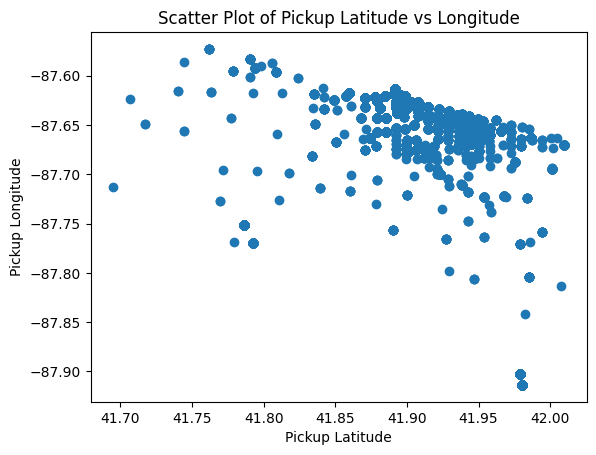

In [73]:
plt.scatter(df1['pickup_latitude'], df1['pickup_longitude'])
plt.xlabel('Pickup Latitude')
plt.ylabel('Pickup Longitude')
plt.title('Scatter Plot of Pickup Latitude vs Longitude')
plt.show()
plt.close()

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA()